## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder

sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [30]:
dataset = pd.read_csv('titanic.csv')

print(dataset.describe())
print("Dataset shape:", dataset.shape)
print(dataset.info())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
Dataset shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 en

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [31]:
print(dataset.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки:

Велика кількість пропущених спостерігається в колонках Age та Cabin. Можна припустити, що колонка Cabin не має великого значення.

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


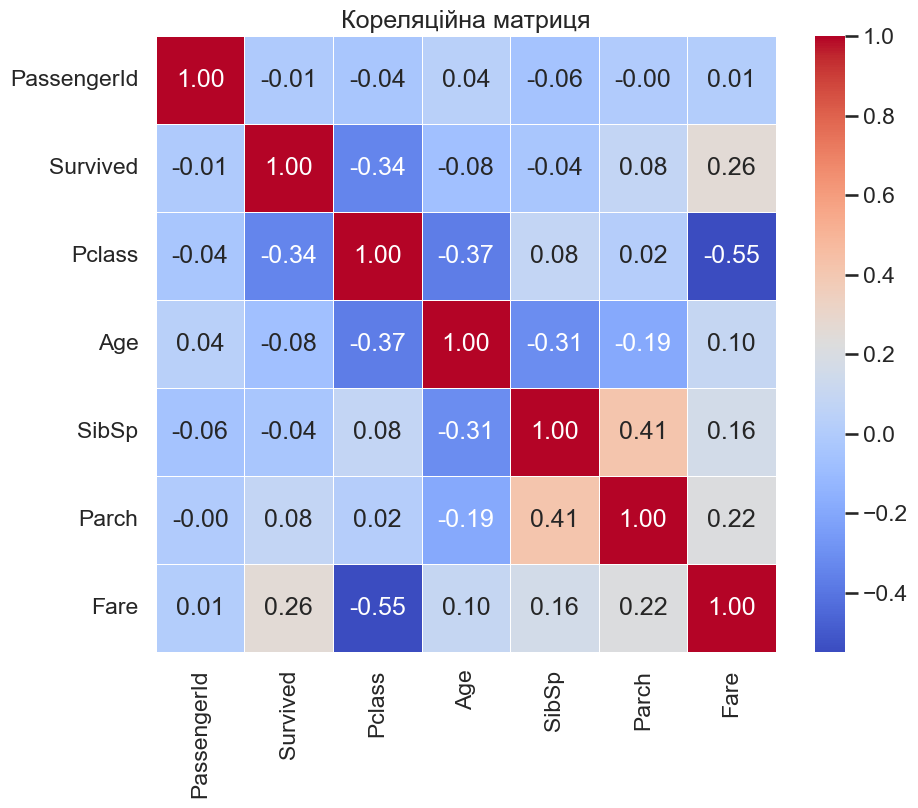

In [32]:
correlation_matrix = dataset.select_dtypes(include=['number']).corr(method='pearson')
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Кореляційна матриця")
plt.show()

Ваші висновки:

Негативні кореляції між Pclass і Fare (квитки для пасажирів нижчого класу (3 клас) дешевші), Survived і Pclass (пасажири першого класу мали більші шанси на виживання), Age і Pclass. Незначна позитивна кореляція між Fare і Survived.

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [ ]:
def fill_missing_by_group(dataset, column_with_missing, group_columns):
    """
    Fills missing values in the specified column with the median by groups.

    Parameters:
        df (DataFrame): The input dataframe.
        column_with_missing (str): The name of the column with missing values.
        group_columns (list): A list of columns by which the grouping will occur.

    Returns:
        DataFrame: The dataframe with missing values filled.
    """
    dataset_filled = dataset.copy()
    dataset_filled[column_with_missing] = dataset_filled.groupby(group_columns)[column_with_missing].transform(lambda x: x.fillna(x.median()))
    
    return dataset_filled

print("Number of missing values before filling:")
print(dataset['Age'].isnull().sum())

dataset_filled = fill_missing_by_group(dataset, 'Age', ['Pclass'])

print("\nNumber of missing values after filling:")
print(dataset_filled['Age'].isnull().sum())

age_counts = Counter(dataset_filled['Age'].tolist())
print(age_counts)

Number of missing values before filling:
177

Number of missing values after filling:
0
Counter({24.0: 166, 37.0: 36, 29.0: 31, 22.0: 27, 18.0: 26, 28.0: 25, 19.0: 25, 30.0: 25, 21.0: 24, 25.0: 23, 36.0: 22, 26.0: 18, 35.0: 18, 27.0: 18, 32.0: 18, 31.0: 17, 16.0: 17, 20.0: 15, 34.0: 15, 33.0: 15, 23.0: 15, 39.0: 14, 40.0: 13, 42.0: 13, 17.0: 13, 45.0: 12, 38.0: 11, 2.0: 10, 4.0: 10, 50.0: 10, 47.0: 9, 44.0: 9, 48.0: 9, 54.0: 8, 9.0: 8, 51.0: 7, 1.0: 7, 14.0: 6, 3.0: 6, 49.0: 6, 41.0: 6, 52.0: 6, 58.0: 5, 15.0: 5, 43.0: 5, 8.0: 4, 5.0: 4, 11.0: 4, 56.0: 4, 62.0: 4, 60.0: 4, 7.0: 3, 65.0: 3, 46.0: 3, 61.0: 3, 6.0: 3, 55.0: 2, 28.5: 2, 0.83: 2, 59.0: 2, 71.0: 2, 32.5: 2, 40.5: 2, 45.5: 2, 63.0: 2, 10.0: 2, 64.0: 2, 13.0: 2, 0.75: 2, 57.0: 2, 70.0: 2, 30.5: 2, 66.0: 1, 14.5: 1, 70.5: 1, 12.0: 1, 36.5: 1, 55.5: 1, 20.5: 1, 23.5: 1, 0.92: 1, 53.0: 1, 80.0: 1, 24.5: 1, 0.67: 1, 0.42: 1, 34.5: 1, 74.0: 1})


Ваші висновки:

Функція коректно заповнює пропущені значення медіаною. Це видно в об'єкті Counter, де відображається вік пасажирів після виправлення.

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





C:\Users\e\AppData\Local\Temp\ipykernel_15304\3933614036.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = dataset_filled.groupby('Age_bin')['Survived'].sum()


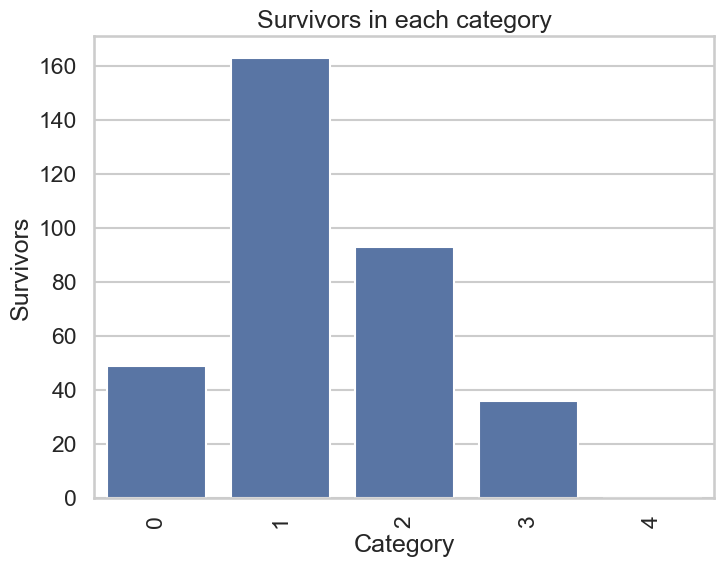

In [34]:
bins = list(range(0, 81, 16))
labels = list(range(0, 5))
dataset_filled['Age_bin'] = pd.cut(dataset_filled['Age'], bins=bins, labels=labels, right=False)

age_survival = dataset_filled.groupby('Age_bin')['Survived'].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=age_survival.index, y=age_survival.values)
plt.title("Survivors in each category")
plt.xlabel("Category")
plt.ylabel("Survivors")
plt.xticks(rotation=90)
plt.show()

Ваші висновки:

Найбільше виживших у першій (1) віковій категорії. Це пов'язано з тим, що люди цього віку складали основну масу пасажирів.

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

C:\Users\e\AppData\Local\Temp\ipykernel_15304\2407583570.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = dataset_filled.groupby('Fare_bin')['Survived'].mean()


Fare_bin
0    0.197309
1    0.303571
2    0.454955
3    0.581081
Name: Survived, dtype: float64


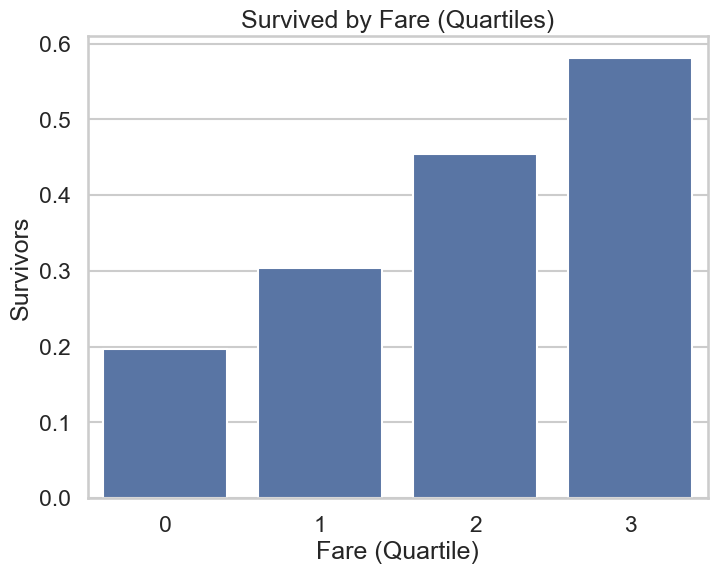

In [35]:
dataset_filled['Fare_bin'] = pd.qcut(dataset_filled['Fare'], q=4, labels=list(range(0, 4)))

fare_survival = dataset_filled.groupby('Fare_bin')['Survived'].mean()
print(fare_survival)

plt.figure(figsize=(8, 6))
sns.barplot(x=fare_survival.index, y=fare_survival.values)
plt.title("Survived by Fare (Quartiles)")
plt.xlabel("Fare (Quartile)")
plt.ylabel("Survivors")
plt.show()

Ваші висновки:

Змінна Fare має значний вплив на виживання. Таким чином, гіпотеза є вірною, кодування використовувати доцільно.

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

Probability of surviving by Family_size:
Family_size
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

Probability of surviving by Alone:
Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64


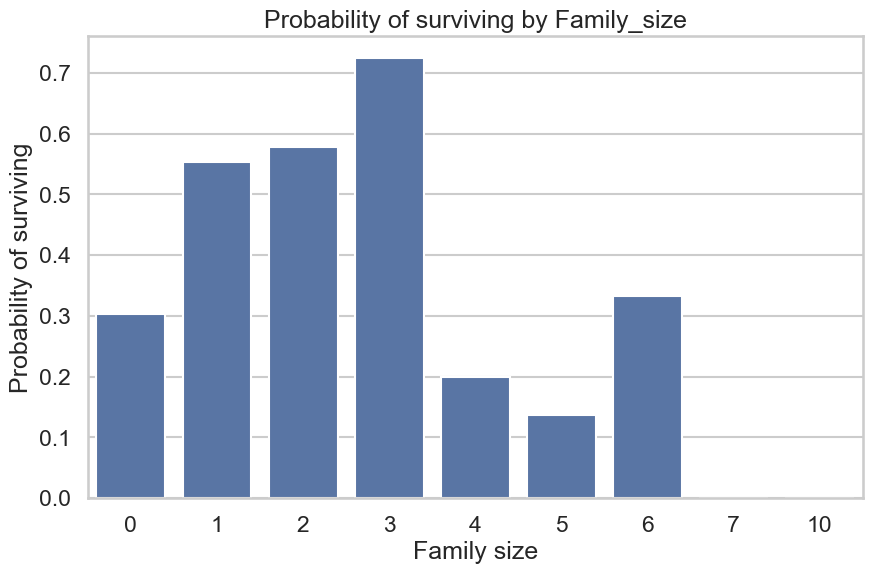

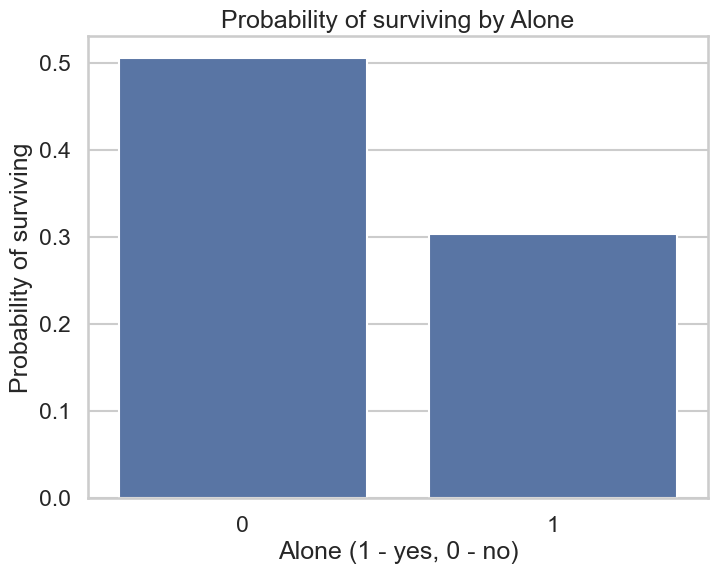

In [36]:
dataset_filled['Family_size'] = dataset_filled['Parch'] + dataset_filled['SibSp']
dataset_filled['Alone'] = dataset_filled['Family_size'].apply(lambda x: 1 if x == 0 else 0)

family_survival = dataset_filled.groupby('Family_size')['Survived'].mean()
alone_survival = dataset_filled.groupby('Alone')['Survived'].mean()

print("Probability of surviving by Family_size:")
print(family_survival)

print("\nProbability of surviving by Alone:")
print(alone_survival)

plt.figure(figsize=(10, 6))
sns.barplot(x=family_survival.index, y=family_survival.values)
plt.title('Probability of surviving by Family_size')
plt.xlabel('Family size')
plt.ylabel('Probability of surviving')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=alone_survival.index, y=alone_survival.values)
plt.title('Probability of surviving by Alone')
plt.xlabel('Alone (1 - yes, 0 - no)')
plt.ylabel('Probability of surviving')
plt.show()

Ваші висновки:

Найбільше вижили невеликі сім'ї (2-3 людей). Самотні пасажири мали менший шанс вижити.

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [37]:
dataset_filled = dataset_filled.drop(['PassengerId', 'Cabin'], axis=1)
print(dataset_filled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    int64   
 1   Pclass       891 non-null    int64   
 2   Name         891 non-null    object  
 3   Sex          891 non-null    object  
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Embarked     889 non-null    object  
 10  Age_bin      890 non-null    category
 11  Fare_bin     891 non-null    category
 12  Family_size  891 non-null    int64   
 13  Alone        891 non-null    int64   
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.8+ KB
None


Ваші висновки:

Атрибут Cabin має велику кількість пропущених значень, а PassengerId не має значення для аналізу.

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [38]:
label_encoder_sex = LabelEncoder()
dataset_filled['Sex'] = label_encoder_sex.fit_transform(dataset_filled['Sex'])

label_encoder_embarked = LabelEncoder()
dataset_filled['Embarked'] = label_encoder_embarked.fit_transform(dataset_filled['Embarked'].fillna('S'))

dataset_filled['Title'] = dataset_filled['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

label_encoder_title = LabelEncoder()
dataset_filled['Title'] = label_encoder_title.fit_transform(dataset_filled['Title'])

print(dataset_filled[['Sex', 'Embarked', 'Title']].head())

title_mapping = dict(zip(label_encoder_title.classes_, label_encoder_title.transform(label_encoder_title.classes_)))
print(title_mapping)

   Sex  Embarked  Title
0    1         2     11
1    0         0     12
2    0         2      8
3    0         2     12
4    1         2     11
{'Capt': np.int64(0), 'Col': np.int64(1), 'Don': np.int64(2), 'Dr': np.int64(3), 'Jonkheer': np.int64(4), 'Lady': np.int64(5), 'Major': np.int64(6), 'Master': np.int64(7), 'Miss': np.int64(8), 'Mlle': np.int64(9), 'Mme': np.int64(10), 'Mr': np.int64(11), 'Mrs': np.int64(12), 'Ms': np.int64(13), 'Rev': np.int64(14), 'Sir': np.int64(15), 'the Countess': np.int64(16)}


Ваші висновки:

Строкові змінні коректно кодуються в числові значення.

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



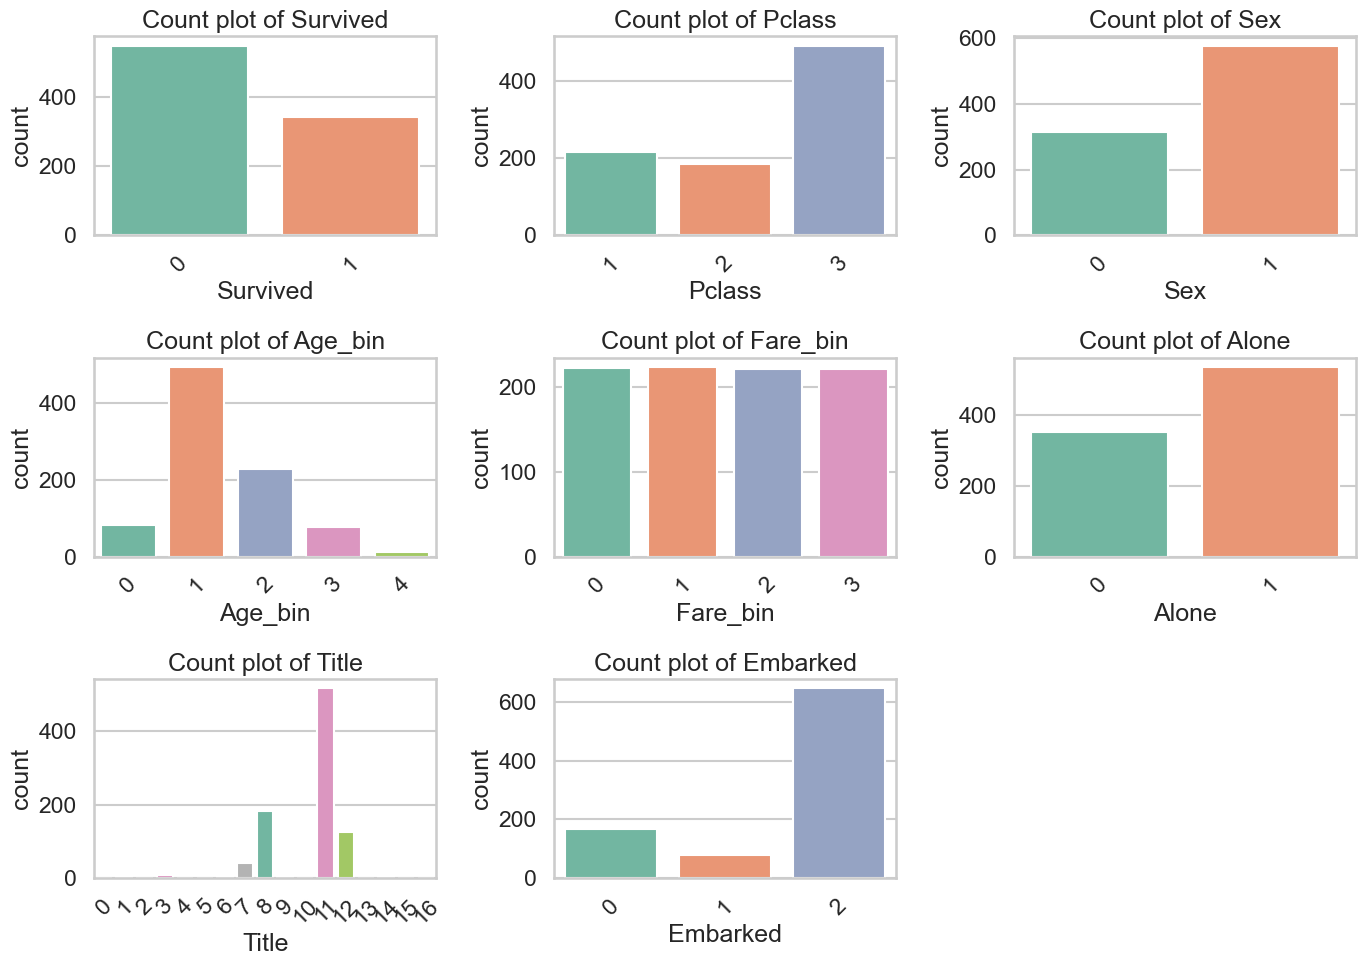

In [39]:
categorical_columns = ['Survived', 'Pclass', 'Sex', 'Age_bin', 'Fare_bin', 'Alone', 'Title', 'Embarked']

plt.figure(figsize=(14, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=dataset_filled, x=column, palette='Set2', legend=False, hue = column)
    plt.title(f'Count plot of {column}')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

Ваші висновки:

Графіки категоріальних змінних співпадають з графіками в другій лабораторній, що підтверджує коректне переведення строкових змінних в числа. Неочікувана кількість титулів, проте більшість зустрічаються надзвичайно рідко. Приблизно рівний розподіл ціни білету за квартилями. Молодих пасажирів найбільше.

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

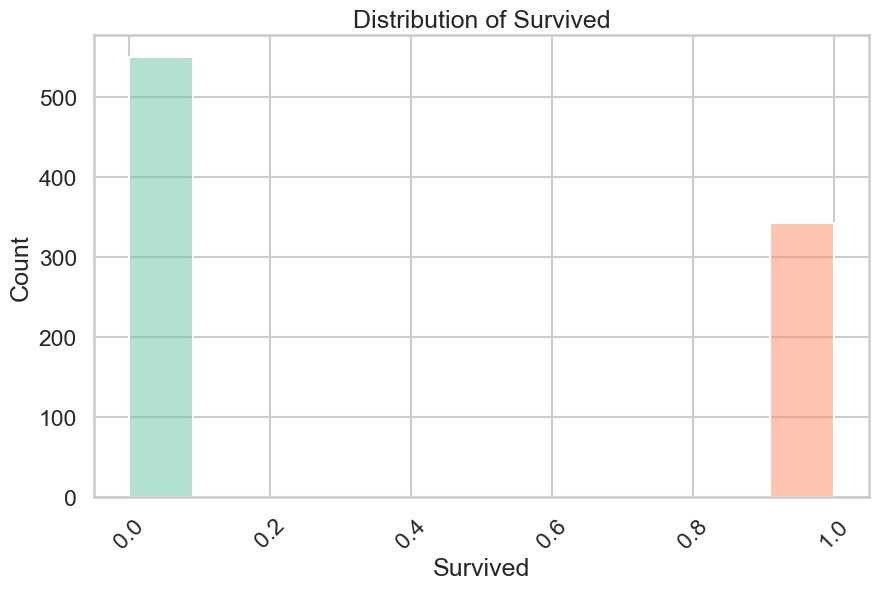

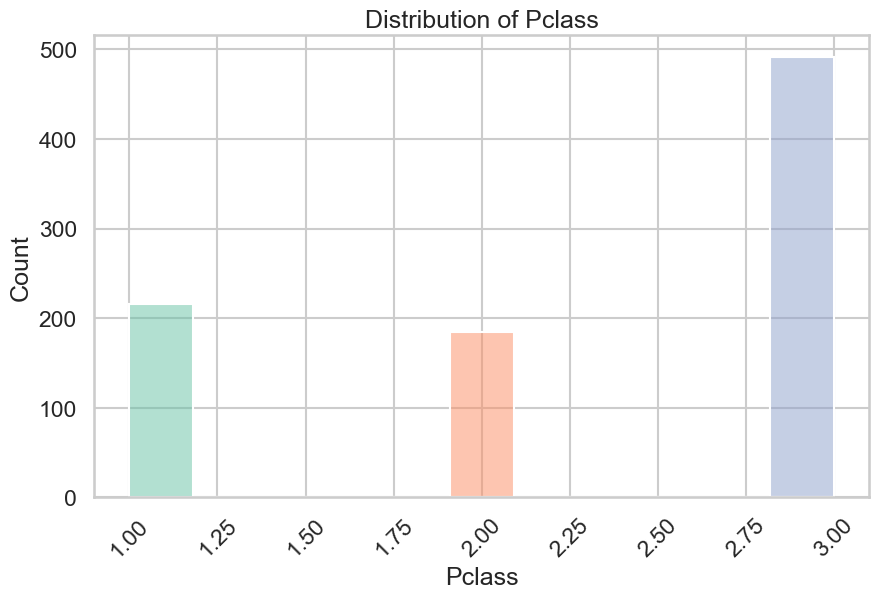

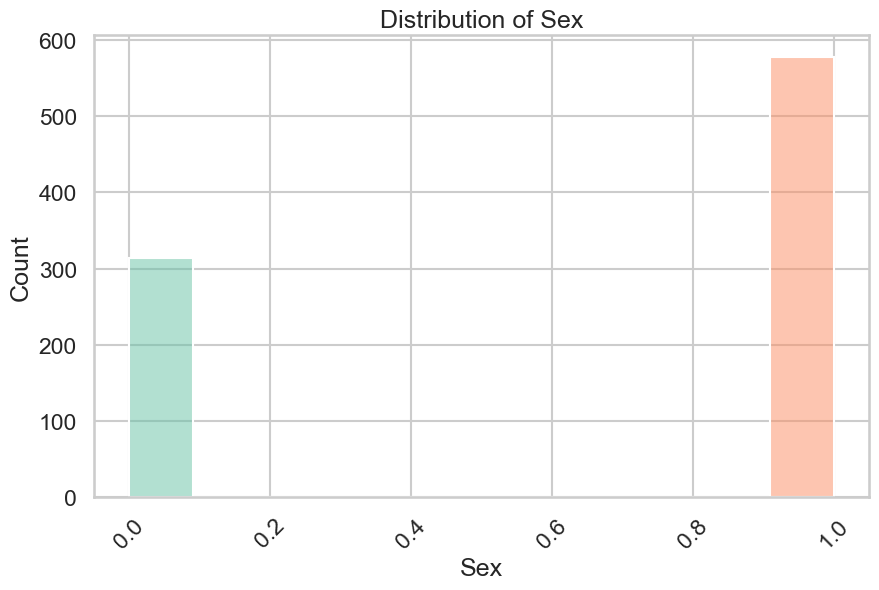

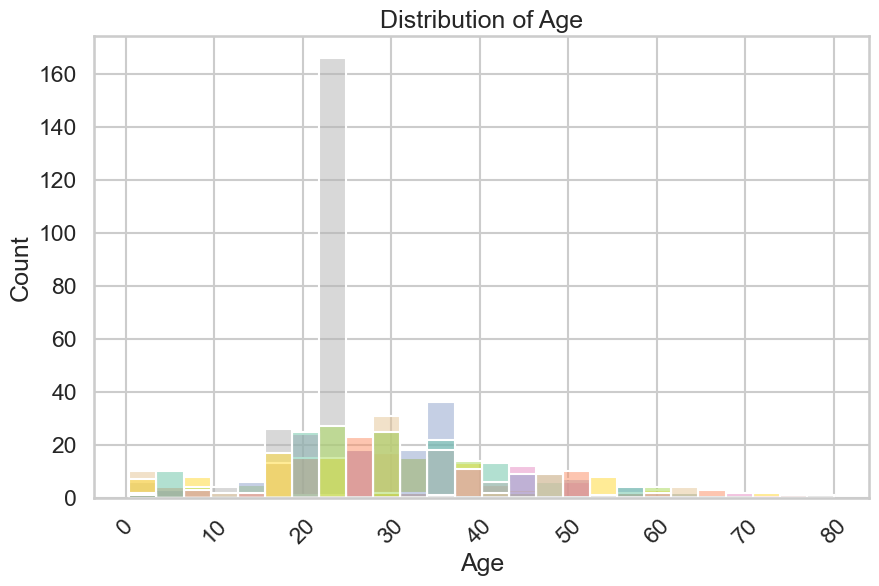

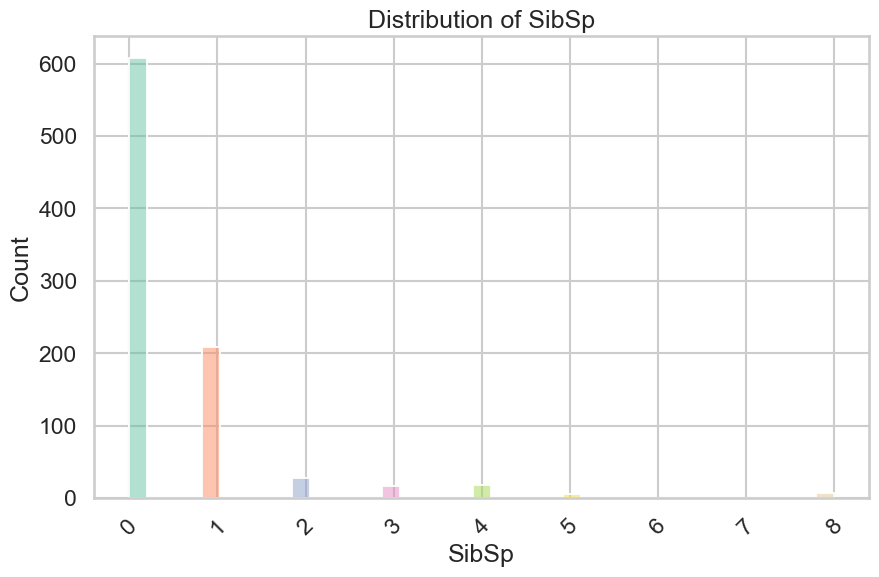

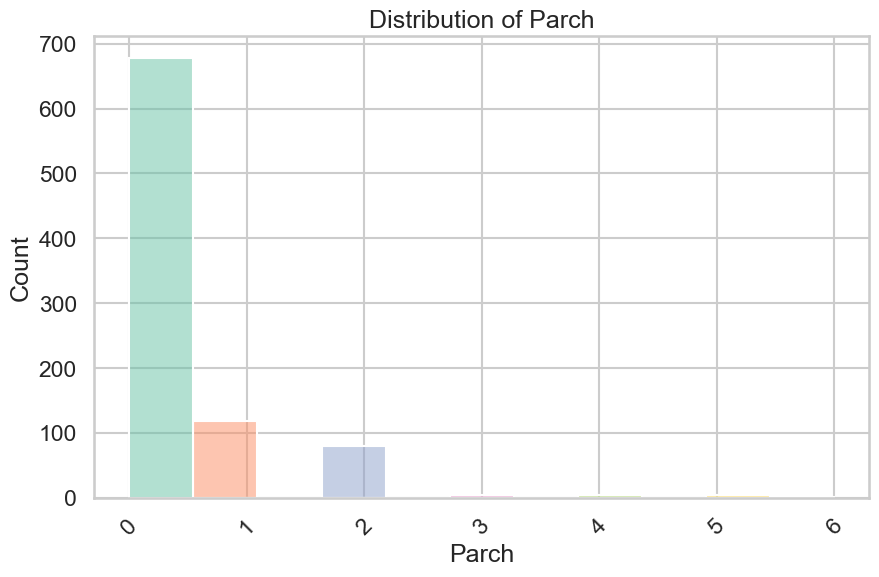

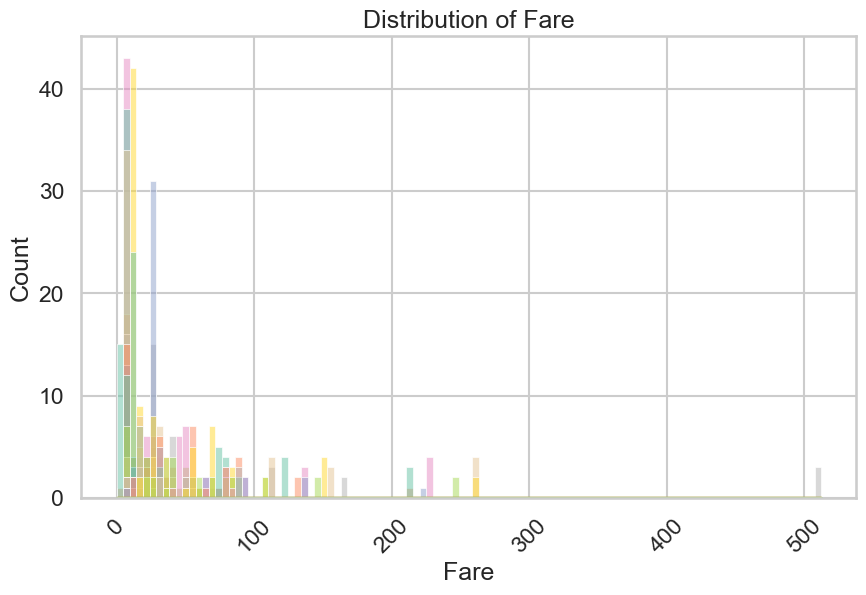

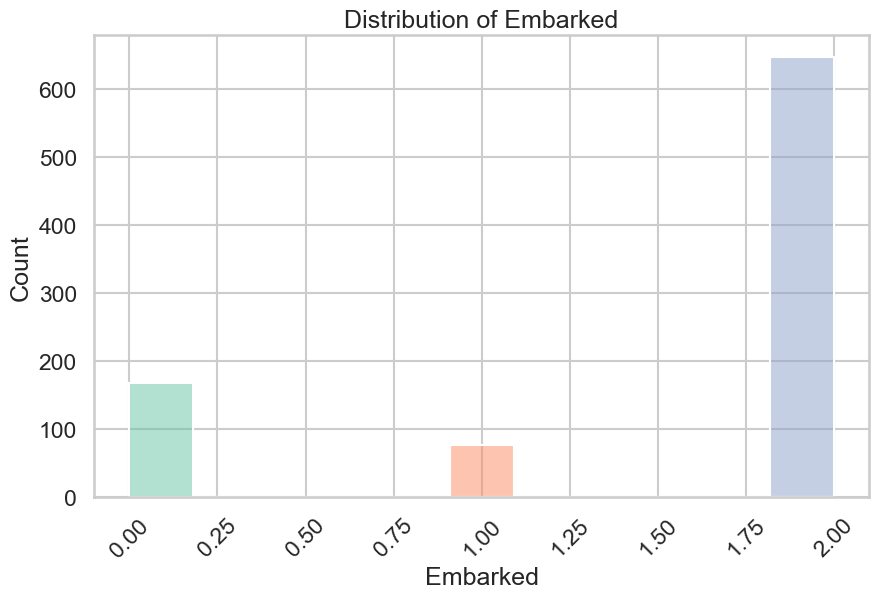

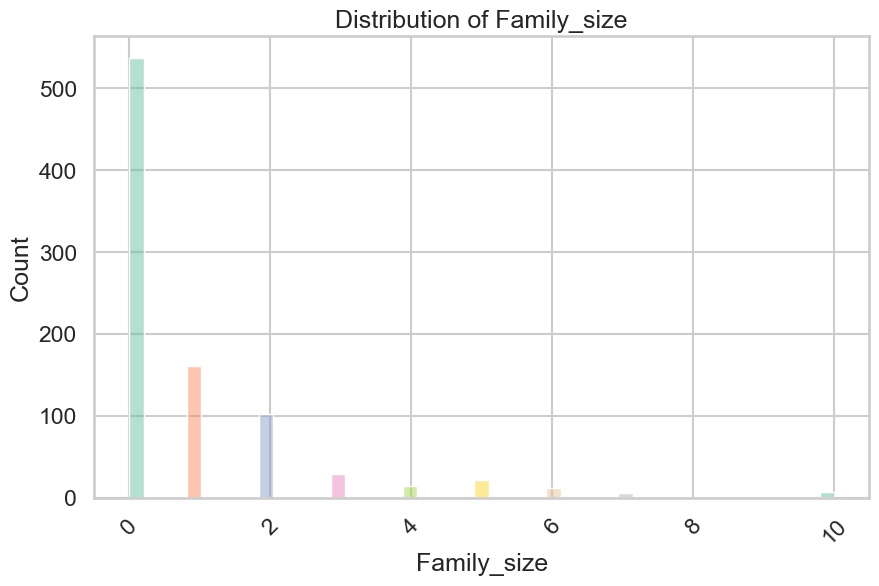

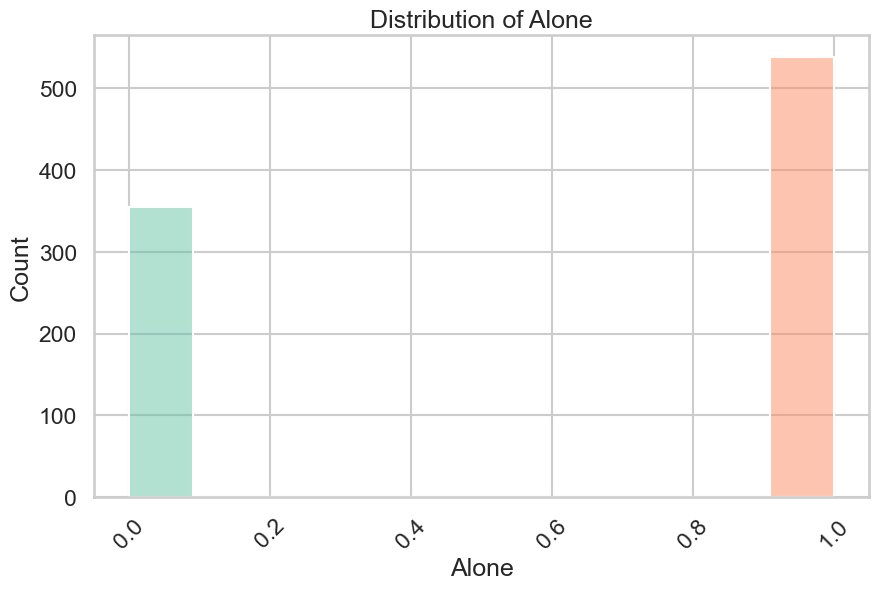

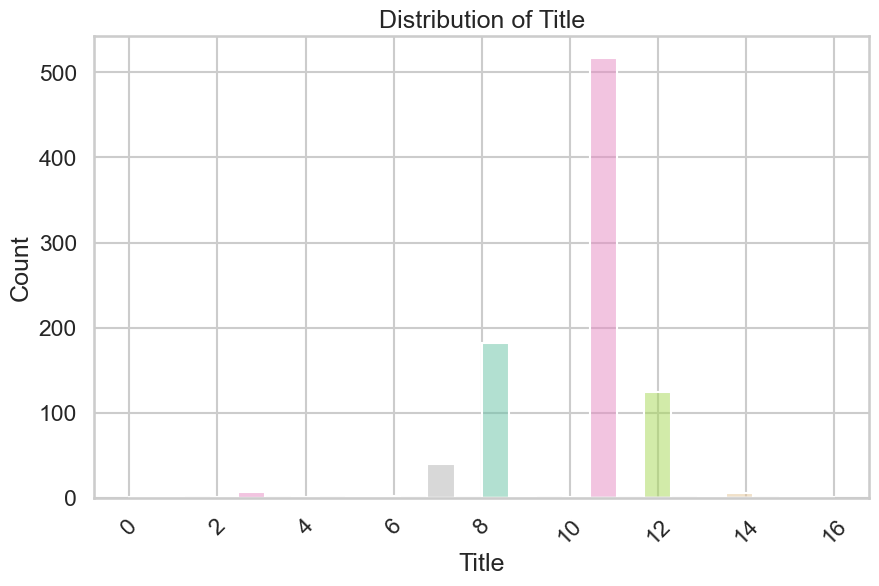

In [40]:
numerical_columns = dataset_filled.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=dataset_filled, x=column, kde=True, palette='Set2', legend=False, hue=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

Ваші висновки:

Висновки щодо більшості графіків описані в попередніх завданнях. Для змінних Title і Fare спостерігається значна кількість викидів. Пасажирів без сім'ї більше. На графіку Age видно, що пропущені значення успішно заповнились медіаною.

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

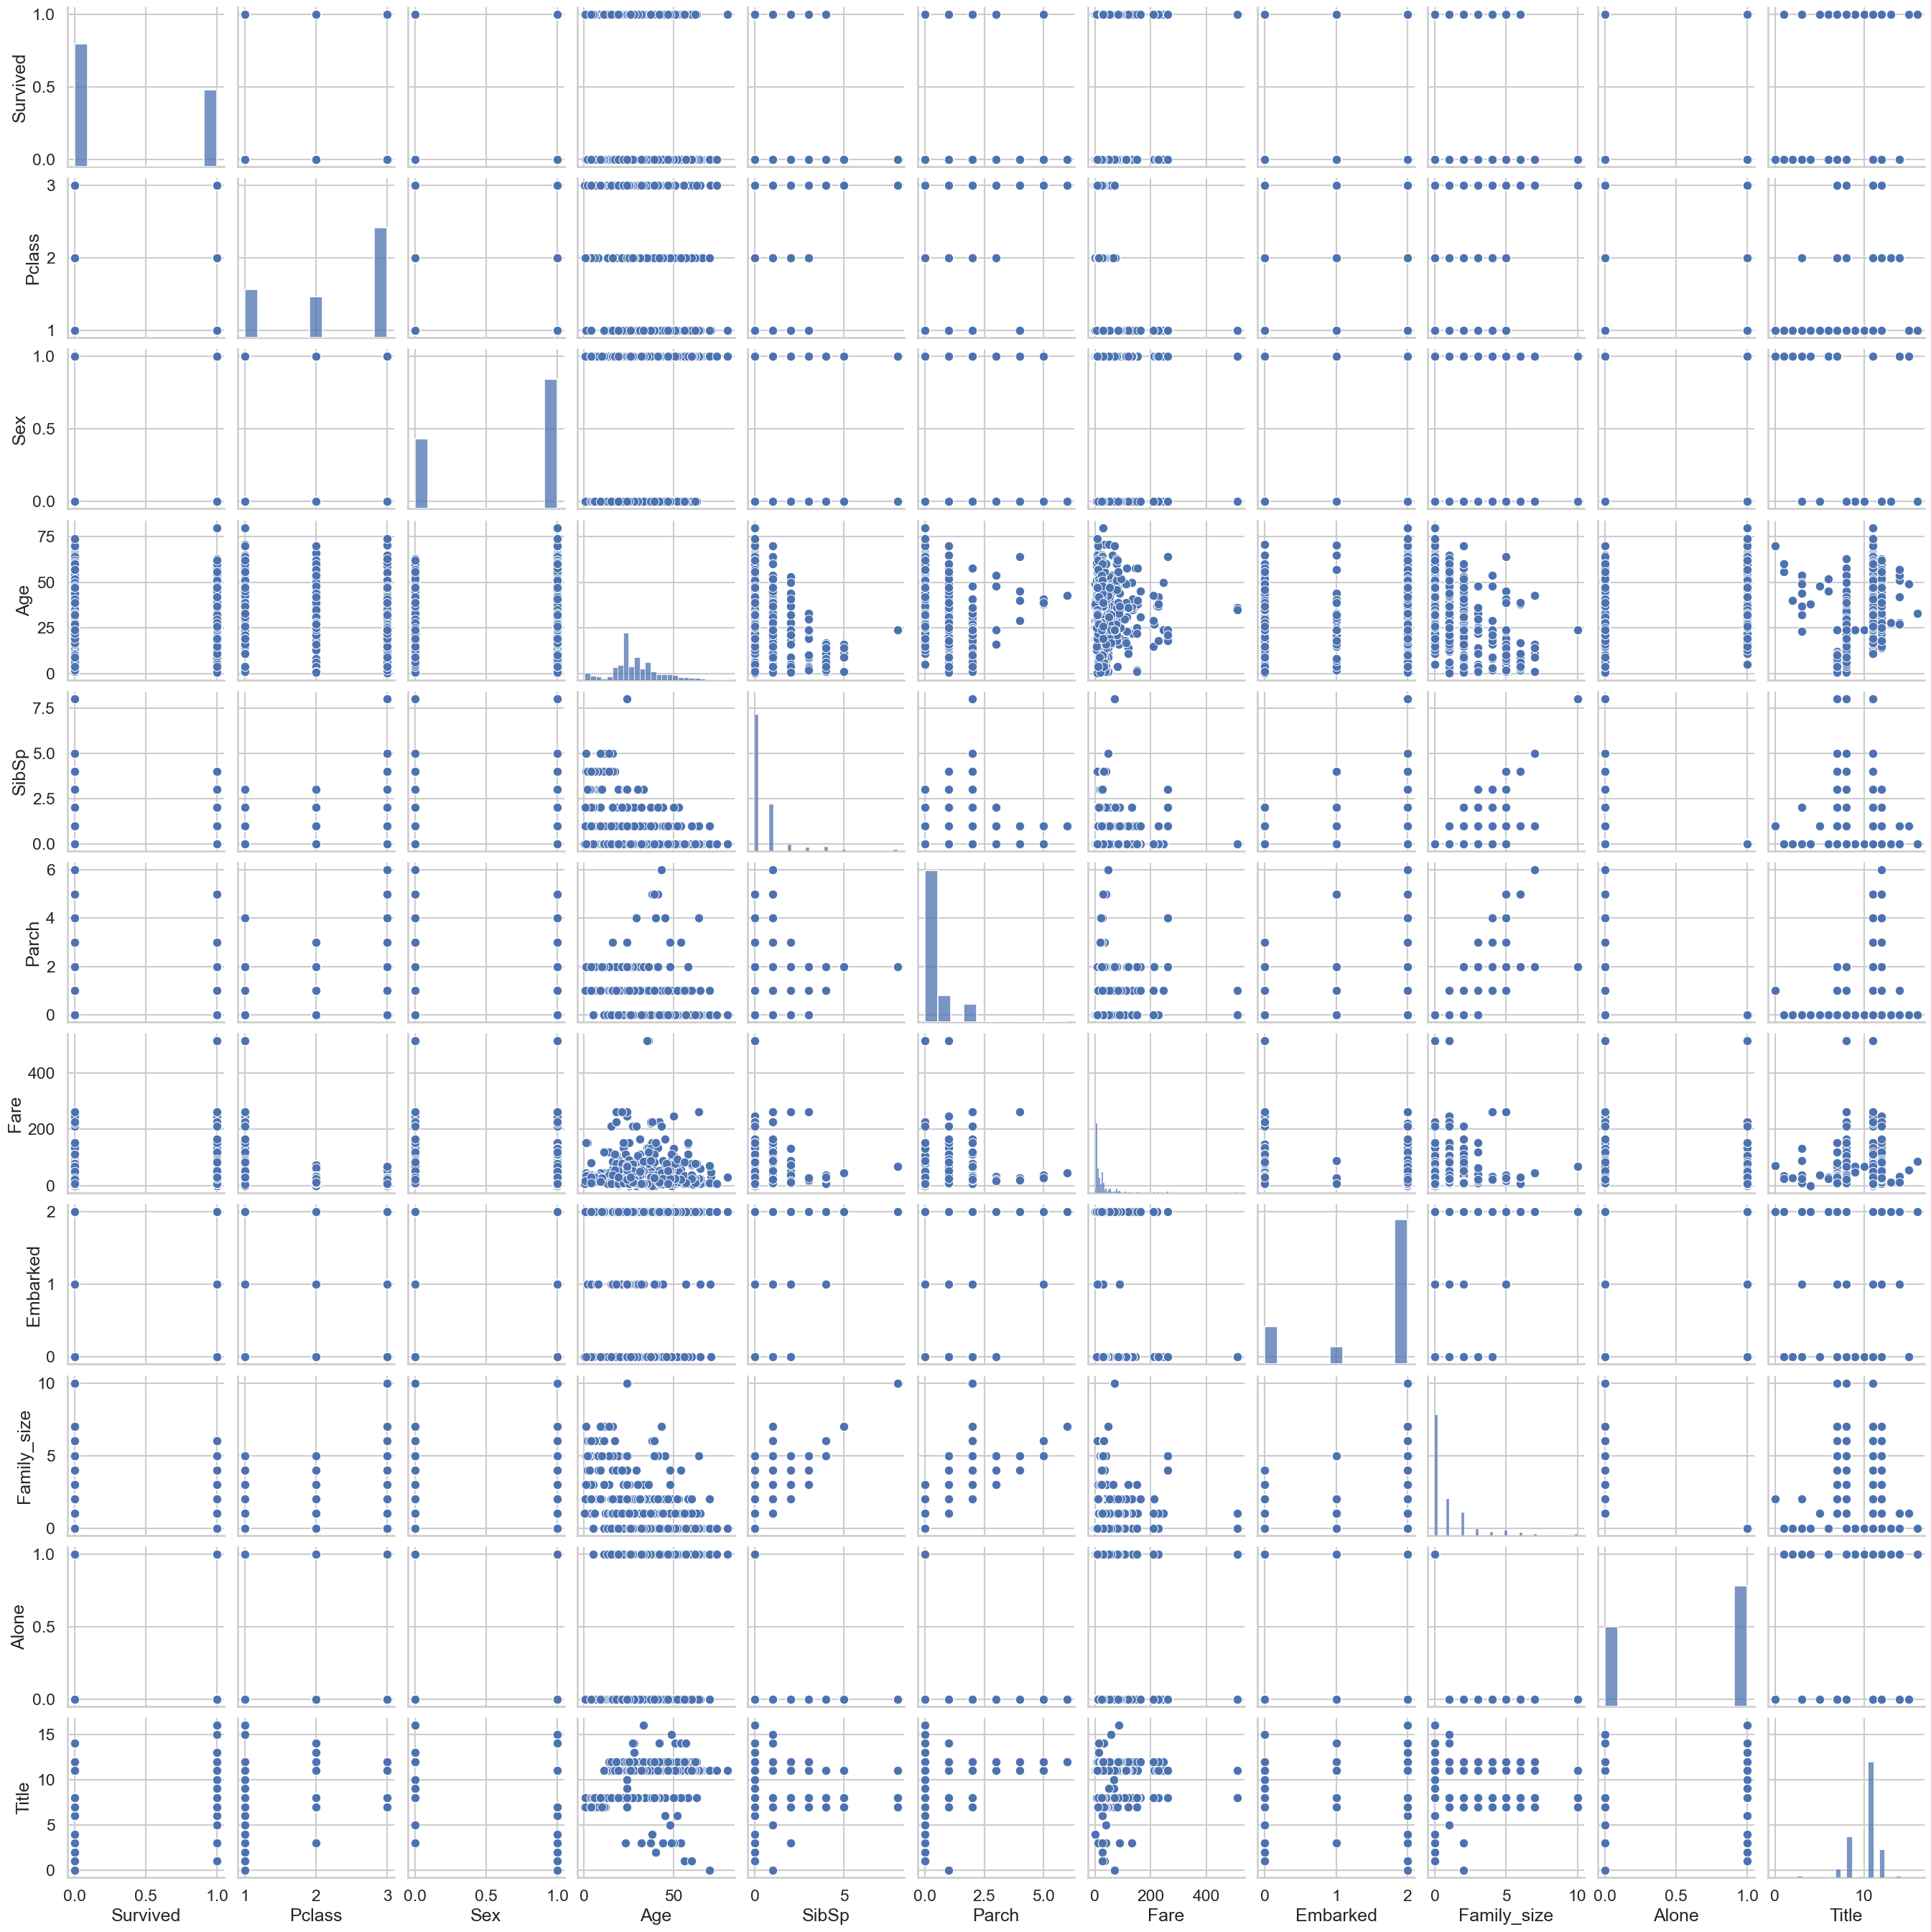

In [41]:
sns.pairplot(dataset_filled[numerical_columns])
plt.show()

Ваші висновки:

Графіки такого роду можуть використовуватись для знаходження кореляції між змінними, побудови передбачень, виявлення викидів, оцінки розподілів.

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.